Guide : https://goalmapguide.com/beginner-friendly-data-science-projects/

Goal : Predict houses prices with ML

Dataset : California Housing Dataset (the Boston one has been removed from sklearn.datasets due to ethical concerns)

In [129]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import pandas as pd

In [130]:
#Load dataset 

housing = fetch_california_housing()

print("Attributes : ",housing.keys())
print(housing['frame'])
for key in housing.keys() :
    if housing[key] is None:
        print(key)
    else :
        print(key,"[0]",housing[key][0])

print(housing["DESCR"])


Attributes :  dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
None
data [0] [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
target [0] 4.526
frame
target_names [0] MedHouseVal
feature_names [0] MedInc
DESCR [0] .
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    

In [131]:
print("Sample from data ")
features=housing['feature_names']
data=pd.DataFrame(housing['data'], columns=features)
target=pd.Series(housing['target'])
print(data.head())
print("Target ")
print(target.head())

Sample from data 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Target 
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


In [132]:

#Check for missing values :
def check_missing(data):
    missing=[]
    for j in range(data.shape[1]) :
        for i in range(data.shape[0]):
            if data.iloc[i,j]==None :
                print('Missing value at row : ',i,'for feature', features[j])
                missing.append(i,j)
    if len(missing)==0:
        print('None ! That is a good dataset.')
    return None

check_missing(data)
    
    

None ! That is a good dataset.


In [133]:
# Select Features and Target – Decide which columns will be used to predict house prices (target variable).
print('All features : ', features)
target_features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'] #completely random, I'm not a real estate agent haha
print('Interesting for houses prices :', target_features)

All features :  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Interesting for houses prices : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']


In [134]:
# Train and test datasets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size=0.30, shuffle=True)
print(len(data_train))
print(len(target_train))
data_train.head()

14448
14448


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8695,5.2590,36.0,5.912234,0.957447,1162.0,3.090426,33.86,-118.34
10443,4.6650,23.0,5.840000,1.084706,1048.0,2.465882,33.42,-117.60
1345,4.1094,14.0,5.993789,1.127329,990.0,3.074534,38.00,-121.90
3630,5.3767,29.0,5.829032,1.041935,1234.0,3.980645,34.22,-118.42
11635,4.2250,34.0,4.635311,0.945007,2072.0,2.998553,33.83,-118.03


In [135]:
# Train model
def ModelHouse(data_train, target_train, target_features) : 
    print(len(target_train))
    train=data_train[target_features] # to not modify the input
    model=LinearRegression()
    model.fit(train, target_train)
    return model


def TargetPrediction(model, data_test,target_test, target_features):
    #Make predictions 
    test=data_test[target_features]
    target_pred=model.predict(test)
    return target_pred, target_test


model=ModelHouse(data_train, target_train, target_features)
target_pred, target_test=TargetPrediction(model, data_test,target_test, target_features)

14448


In [136]:
r2 = r2_score(target_test, target_pred)
print('R2 : ', r2)
mse=mean_squared_error(target_test, target_pred)
print('MSE :', mse)

R2 :  0.5390051880278566
MSE : 0.6242402349174219


Moderate MSE, Moderate R2 : okay performance, only explains 50%

In [137]:
print("Pred min:", target_pred.min())
print("Pred max:", target_pred.max())
print("Target test min:", target_test.min())
print("Target test max:", target_test.max())

Pred min: -0.25898543181978884
Pred max: 7.754188357954856
Target test min: 0.14999
Target test max: 5.00001


[]

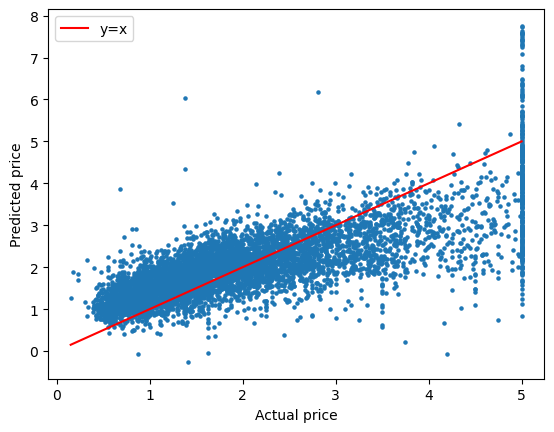

In [138]:
#Visualize
plt.scatter(target_test, target_pred, s=5)
plt.plot([min(target_test), max(target_test)],
         [min(target_test), max(target_test)],
         color="red", label="y=x")   # 45-degree correctness line
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.legend()
plt.plot()

Seems like a flat distribution

Slight bending from y=x, so slightly biased model

vertical cluster at 5 : because actual prices are at most 5, but predict a range


-> Because : not the right features ? not a linear regression ? (exponential or polynomial ?)



14448
R2 :  0.6060883440530725
MSE : 0.5334018914292671


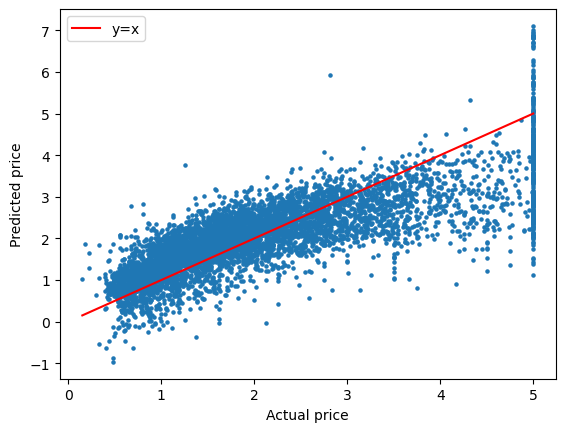

In [139]:
model=ModelHouse(data_train, target_train,features)
target_pred, target_test=TargetPrediction(model, data_test,target_test, features)
plt.scatter(target_test, target_pred, s=5)
plt.plot([min(target_test), max(target_test)],
         [min(target_test), max(target_test)],
         color="red", label="y=x")   # 45-degree correctness line
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.legend()
plt.plot()

r2 = r2_score(target_test, target_pred)
print('R2 : ', r2)
mse=mean_squared_error(target_test, target_pred)
print('MSE :', mse)



In [140]:
print("Pred min:", target_pred.min())
print("Pred max:", target_pred.max())
print("Target test min:", target_test.min())
print("Target test max:", target_test.max())

Pred min: -0.9676768177196351
Pred max: 7.105301252428845
Target test min: 0.14999
Target test max: 5.00001


In [141]:
#Negative values :use log and exp
import numpy as np
data_train_log=np.log1p(data_train)
data_test_log=np.log1p(data_test)
target_train_log=np.log1p(target_train)
target_test_log=np.log1p(target_test)

print(data_train_log.head())

model=ModelHouse(data_train, target_train_log,features)
target_pred, target_test=TargetPrediction(model, data_test,target_test_log, features)

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
8695   1.834020  3.610918  1.933293   0.671641    7.058758  1.408649   
10443  1.734307  3.178054  1.922788   0.734628    6.955593  1.242967   
1345   1.631082  2.708050  1.945022   0.754867    6.898715  1.404756   
3630   1.852651  3.401197  1.921183   0.713898    7.118826  1.605559   
11635  1.653455  3.555348  1.729052   0.665266    7.636752  1.385933   

       Latitude  Longitude  
8695   3.551340        NaN  
10443  3.538638        NaN  
1345   3.663562        NaN  
3630   3.561614        NaN  
11635  3.550479        NaN  
14448


c:\Users\nyoui\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


Farther from the diagonal, completely

-> Better model, so important to choose the right model. 

-> Better MSE and R2

Take more features = more info, even if useless or redundant


In [142]:
# Actually use the model
target_features=[6.,20.,9.,2.,400.,2.1,36.7783,-114.8]
print(features)
print('Characteristics:',target_features)
pred=model.predict([target_features])
print('Predicted price:',np.expm1(pred))



['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Characteristics: [6.0, 20.0, 9.0, 2.0, 400.0, 2.1, 36.7783, -114.8]
Predicted price: [0.46419045]


c:\Users\nyoui\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [143]:
target_features=[8.,40.,9.,1.5,576.,2.8,30.1,-121.8]
print(features)
print('Characteristics:',target_features)
pred=model.predict([target_features])
print('Predicted price:',np.expm1(pred))

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Characteristics: [8.0, 40.0, 9.0, 1.5, 576.0, 2.8, 30.1, -121.8]
Predicted price: [16.04873822]


c:\Users\nyoui\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
